In [2]:
import numpy as np
import matplotlib.pyplot as plt
from filter_design_analysis.analysis import *
from filter_design_analysis.filter import *
from filter_design_analysis.signal import *

Text(0.5, 0, 'time (samples)')

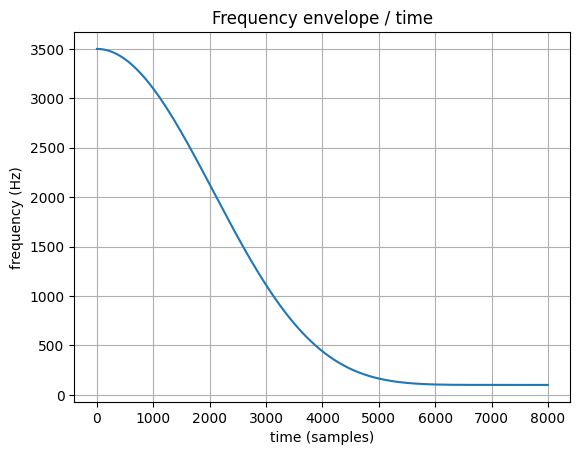

In [18]:
def freqenv(phase, slope, fmin, fmax):
    base_envelope = 1 - np.power((2*phase - 1), 2)
    return np.power(base_envelope, slope) * (fmax-fmin) + fmin

plt.plot(freqenv(np.linspace(0.5,1.0,8000), 8, 100, 3500))
plt.grid()
plt.title("Frequency envelope / time")
plt.ylabel("frequency (Hz)")
plt.xlabel("time (samples)")

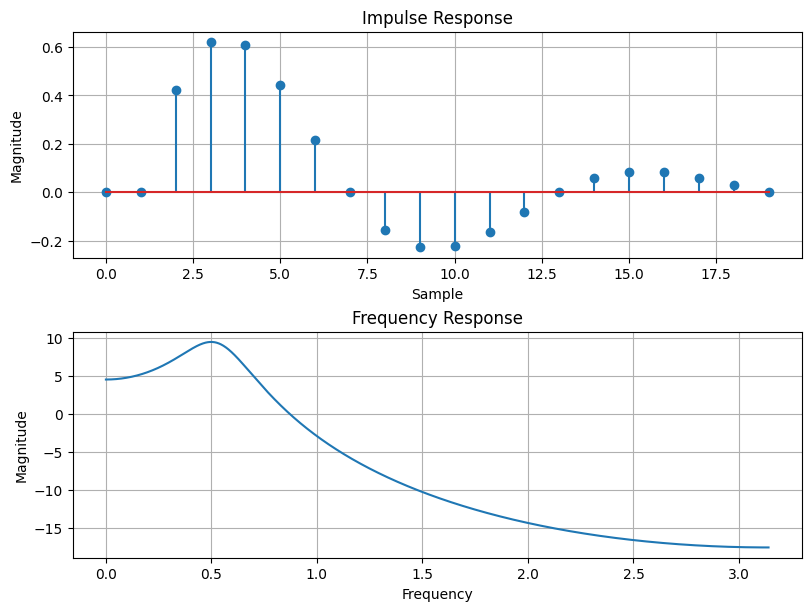

In [19]:
class ResonFilter:

    def __init__(self, f, tau, Fs):
        self.yzm1 = 0
        self.yzm2 = 0
        self.xzm1 = 0
        self.xzm2 = 0
        self.b0 = 0
        self.b1 = 0
        self.b2 = 0
        self.a1 = 0
        self.a2 = 0
        self.Fs = Fs
        self.set(f,tau)

    def set(self, f, tau):
        r = np.exp(- 1 /(tau * self.Fs))
        theta = 2 * np.pi * f / self.Fs
        x1 = r * np.cos(theta)
        y1 = r * np.sin(theta)

        self.b2 = y1
        self.a1 = -2 * x1
        self.a2 = (x1*x1 + y1*y1)
    
    def process(self, inputValue):
        outputValue = self.b2 * self.xzm2 + self.b1 * self.xzm1 + self.b0 * inputValue  - self.a1 * self.yzm1 - self.a2 * self.yzm2
        self.yzm2 = self.yzm1
        self.yzm1 = outputValue
        self.xzm2 = self.xzm1
        self.xzm1 = inputValue
        return outputValue

ff = ResonFilter(400, 0.00125, 4800)
analyse_filter(ff)


Text(0.5, 0, 'time (samples)')

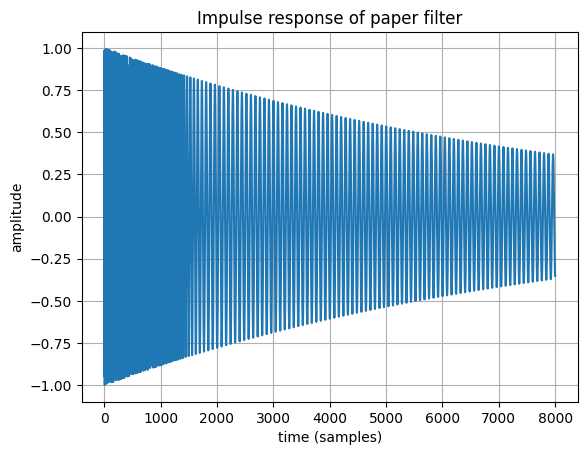

In [20]:
L = 8000
tau = 1.0

filterFunction = mvmfilter(440, tau, 8000)
frequency_envelope =  freqenv(np.linspace(.5,1,L), 128, 100, 3800)

impulse_response = np.zeros(L)
for index, impulse_sample in enumerate(impulse_signal(L)):
    filterFunction.set(frequency_envelope[index], tau)
    impulse_response[index] = filterFunction.process(impulse_sample)

plt.plot(impulse_response)
plt.grid()
plt.title("Impulse response of paper filter")
plt.ylabel("amplitude")
plt.xlabel("time (samples)")

Text(0.5, 0, 'time (samples)')

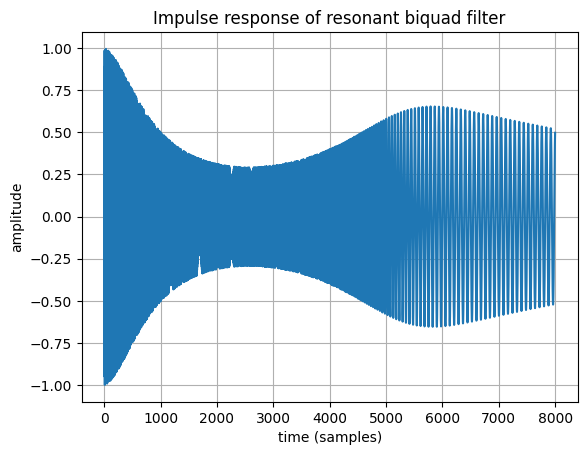

In [16]:
L = 8000
tau = 1.0

filterFunction = ResonFilter(440, tau, 8000)
frequency_envelope = freqenv(np.linspace(.5,1,L), 8, 100, 3800)

impulse_response = np.zeros(L)
for index, impulse_sample in enumerate(impulse_signal(L)):
    filterFunction.set(frequency_envelope[index], tau)
    impulse_response[index] = filterFunction.process(impulse_sample)

plt.plot(impulse_response)
plt.grid()
plt.title("Impulse response of resonant biquad filter")
plt.ylabel("amplitude")
plt.xlabel("time (samples)")